## **Radial Basis Function**
Image result for what is radial basis function
In the field of mathematical modeling, a radial basis function network is an artificial neural network that uses radial basis functions as activation functions. ... Radial basis function networks have many uses, including function approximation, time series prediction, classification, and system control.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import binary_crossentropy

### **reading dataset**
`Kuzushiji-MNIST` is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.

In [8]:
''' reading dataset '''
X = np.load(r'C:\Users\jgaur\Downloads\data\k49-train-imgs.npz')['arr_0']
y = np.load(r'C:\Users\jgaur\Downloads\data\k49-train-labels.npz')['arr_0']

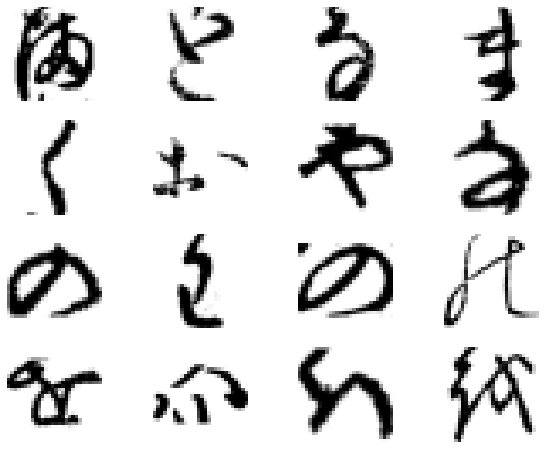

In [9]:
''' plotting some images '''
plt.figure(figsize=(10,8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X[i], cmap='binary')
    plt.axis('off')
plt.axis('off');

In [10]:
X.shape

(232365, 28, 28)

### **RBF Model**
The centre, the distance scale, and the precise shape of the radial function are parameters of the model, all fixed if it is linear. r2 : Its parameters are its centre c and its radius r. Figure 2 illustrates a Gaussian RBF with centre c = 0 and radius r = 1.

In [11]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation='sigmoid', name='foo'))

''' initializing the loss and optimizer '''
model.compile(optimizer='rmsprop', loss=binary_crossentropy)

In [12]:
''' training '''
model.fit(X, y, batch_size=256, epochs=50)

Epoch 1/50
908/908 [==============================] - 28s 28ms/step - loss: -4.4745
Epoch 2/50
908/908 [==============================] - 31s 35ms/step - loss: -24.2075
Epoch 3/50
908/908 [==============================] - 48s 52ms/step - loss: -43.8412 0s - loss
Epoch 4/50
908/908 [==============================] - 52s 58ms/step - loss: -63.3831
Epoch 5/50
908/908 [==============================] - 51s 56ms/step - loss: -82.8962
Epoch 6/50
908/908 [==============================] - 46s 50ms/step - loss: -102.3834
Epoch 7/50
908/908 [==============================] - 49s 53ms/step - loss: -121.6799
Epoch 8/50
908/908 [==============================] - 53s 59ms/step - loss: -141.3230
Epoch 9/50
908/908 [==============================] - 50s 55ms/step - loss: -160.4764
Epoch 10/50
908/908 [==============================] - 57s 62ms/step - loss: -180.0515
Epoch 11/50
908/908 [==============================] - 54s 59ms/step - loss: -257.5229
Epoch 15/50
908/908 [===========================